*Member 1*

Name: Omar Aref 

ID: 46-5432

*Member 2*

Name: Hana Adel

ID: 46-0377

*Member 3*

Name: Sarah Halla

ID: 46-0431

*Member 4*

Name: Farida El Genedi  

ID: 46-2291

*Member 5*

Name: Shawky Haitham  

ID: 46-3502

# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

In [4]:
pip install seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb

# 1 - Extraction

In [6]:
df  = pd.read_csv("2020_Accidents_UK.csv", low_memory=False);
sb.set(rc={'figure.figsize':(11.7,8.27)})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62033 entries, 0 to 62032
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               62033 non-null  object 
 1   accident_year                                62033 non-null  int64  
 2   accident_reference                           62033 non-null  object 
 3   location_easting_osgr                        62029 non-null  float64
 4   location_northing_osgr                       62029 non-null  float64
 5   longitude                                    62029 non-null  float64
 6   latitude                                     62029 non-null  float64
 7   police_force                                 62033 non-null  object 
 8   accident_severity                            62033 non-null  object 
 9   number_of_vehicles                           62033 non-null  int64  
 10

In [8]:
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,Metropolitan Police,Slight,1,...,unknown (self reported),Daylight,NaN,unknown (self reported),None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,Metropolitan Police,Slight,1,...,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,Metropolitan Police,Serious,1,...,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01004763


# 2- EDA

### Question 1: What are the most frequent locations (clusters) that have accidents? We will use the latitude and longitude data found in the dataset provided.  


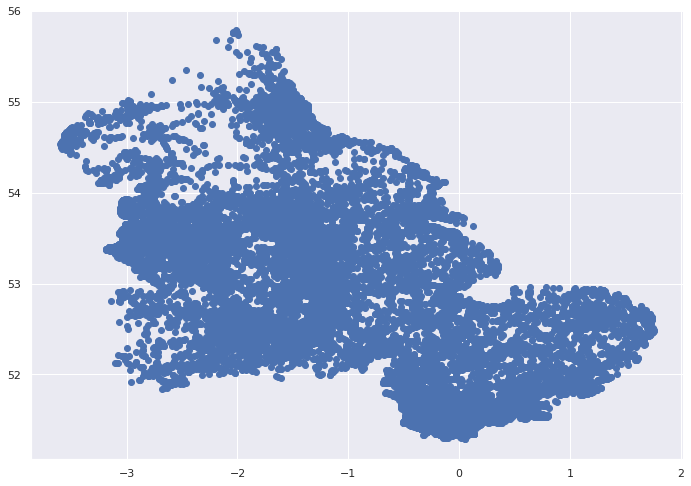

In [9]:
plt.plot(df['longitude'], df['latitude'], 'o', );

We can see that there are many points in the data, so we will need to plot every 150th point to deteremine any pattern in the data.

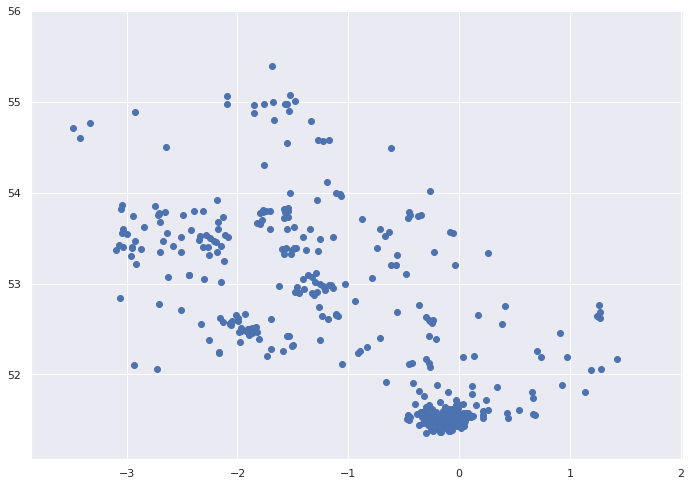

In [10]:
plt.plot(df['longitude'], df['latitude'], 'o', ms=6, markevery=150);

We can now see the resemblance between the figure and the map of the UK. It is clear from the clusters in the figure that areas with higher population count like London in the lower right corner, Manchester in the middle towards the left, and Liverpool above Manchester on the left have higher number of accidents.

### Question 2: Does the day of the week affect the number of accidents? Moreover, does the time of the day have an effect on the number of accidents? 

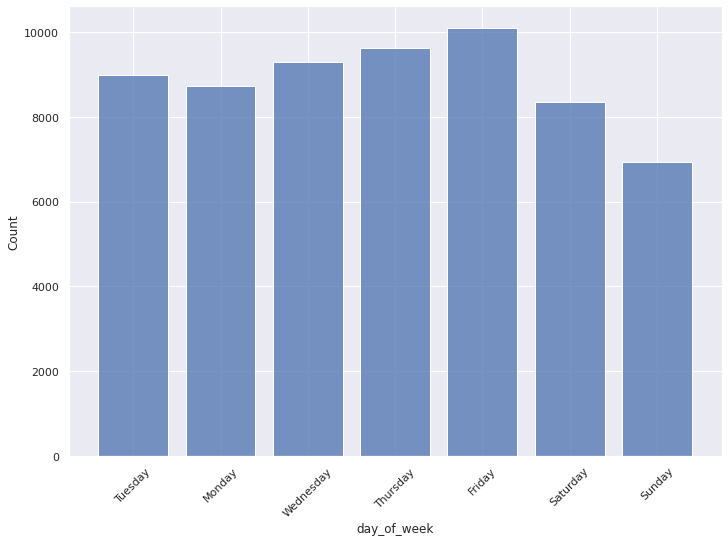

In [11]:
sb.histplot(df['day_of_week'], shrink=.8)
plt.xticks(rotation=45);
# plt.hist(df['day_of_week'])

It is clear from the histogram that the number of the accidents is at a peak on fridays and drops significantly on the weekends and especially on Sundays. Next, we will analyze the time of the day's effect on the number of accidents.

In [12]:
df['time'].head()

0    09:00
1    13:55
2    01:25
3    01:50
4    02:25
Name: time, dtype: object

In [13]:
def get_hour (x:str) :
    return (x.split(':')[0])

df['time_hour']= df['time'].apply(get_hour)

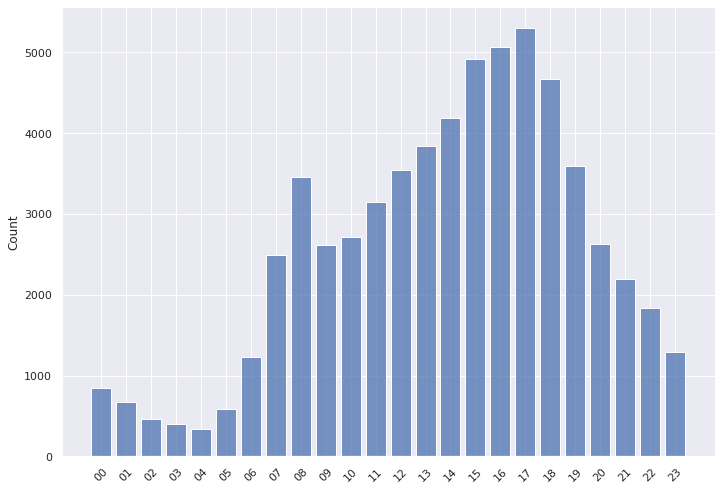

In [14]:
sb.histplot(np.sort(df['time_hour']), shrink=.8,  bins=24)
plt.xticks(rotation=45);

From the histogram, it is clear that the most number of accidents happen at 17:00 and 18:00, which can be explained with the rush hour. Morever, the least number of accidents occur from 22:00 till 6:00, we can deduce that this is because people are usually asleep during those times and thus less people are driving resulting in less accidents.

## We will now delve in the multivariate exploration of the data
### Question 3: We will now explore the relationship between the road type and the severity and the number of causalties in that accident 

In [15]:
df['road_type'].unique()

array(['Single carriageway', 'One way street', 'Dual carriageway',
       'Slip road', 'Roundabout', nan], dtype=object)

In [16]:
df['accident_severity'].unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [17]:
df['number_of_casualties'].count()

62033

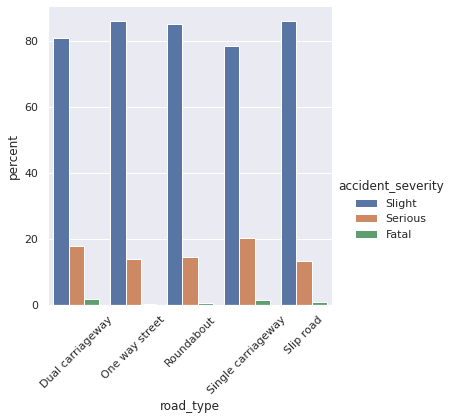

In [18]:
df1 = df.groupby("road_type")["accident_severity"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
sb.catplot(data=df1, x="road_type", y="percent", hue="accident_severity", kind="bar")
plt.xticks(rotation=45);


We can see that that the singel carriageway has more serious and fatal accidents compared to other road types.

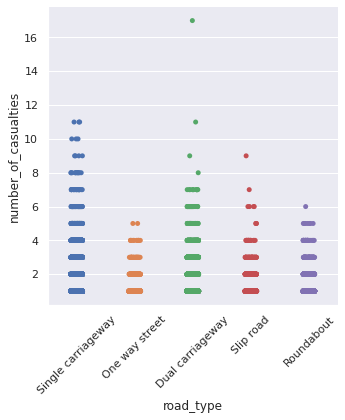

In [19]:
sb.catplot(data=df, x="road_type", y="number_of_casualties")
plt.xticks(rotation=45);


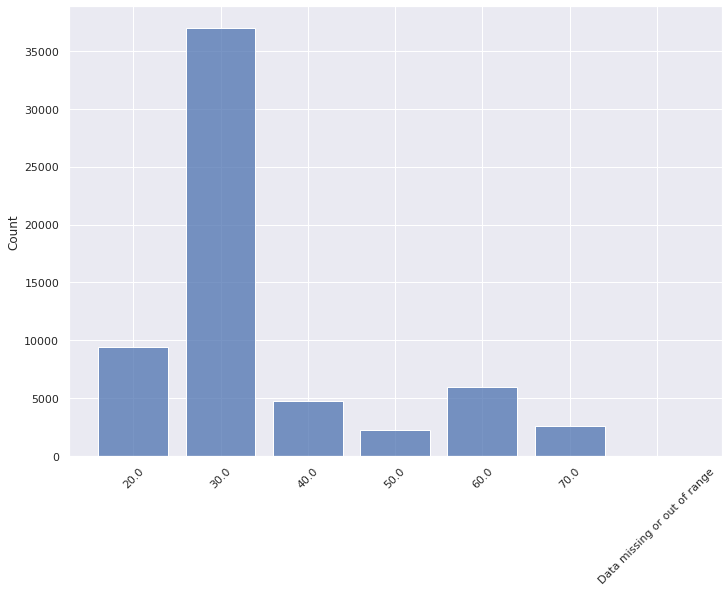

In [20]:
sb.histplot(np.sort(df['speed_limit']), shrink=.8,)
plt.xticks(rotation=45);

In [21]:
df['speed_limit'].value_counts()

30.0                            37002
20.0                             9379
60.0                             5989
40.0                             4775
70.0                             2601
50.0                             2276
Data missing or out of range       11
Name: speed_limit, dtype: int64

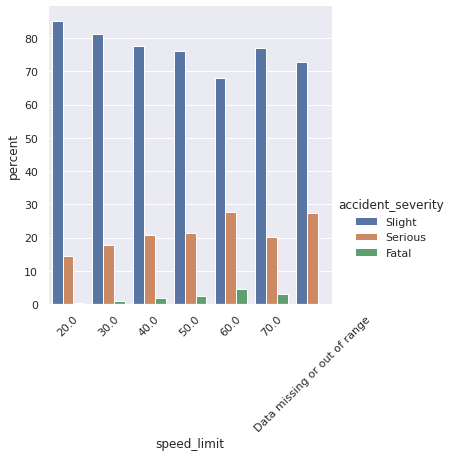

In [22]:
df1 = df.groupby("speed_limit")["accident_severity"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
sb.catplot(data=df1, x="speed_limit", y="percent", hue="accident_severity", kind="bar")
plt.xticks(rotation=45);

Finished EDA

# 3 - Cleaning Data

## Observing Missing and duplicate Data

## Handling Missing data

## Findings and conclusions

## Observing outliers

## Handling outliers

## Findings and conclusions

# 4 - Data transformation

## 4.1 - Discretization

## 4.11 - Findings and conclusions

## 4.2 - Encoding

## 4.22 - Findings and conlcusions

## 4.3 - Normalisation 

## 4.31 - Findings and conclusions

## 4.4 - Adding more columns

## 4.41 - Findings and concluisons

## 4.5 - Csv file for lookup

## 5- Exporting the dataframe to a csv file or parquet